# Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [25]:
class LinearRegression:

    def __init__(self, lr=0.05, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

In [3]:
salary = pd.read_csv('data/salary_dataset.csv')
salary.drop(labels='Unnamed: 0', axis=1, inplace=True)
salary.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


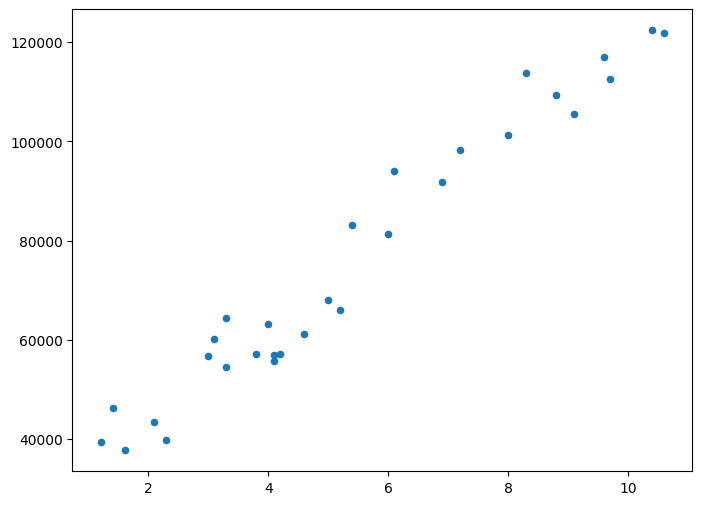

In [4]:
fig = plt.figure(figsize=(8,6))
plt.scatter(salary['YearsExperience'], salary['Salary'], s=20)

In [5]:
X = salary[['YearsExperience']]
y = salary['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(24, 1)
(24,)


In [28]:
def rmse(y_true, y_predicted):
    return np.mean((y_true - y_predicted) ** 2) ** 0.5

In [29]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

mse_value = rmse(y_test, predicted)
print(mse_value)

7059.063029539087


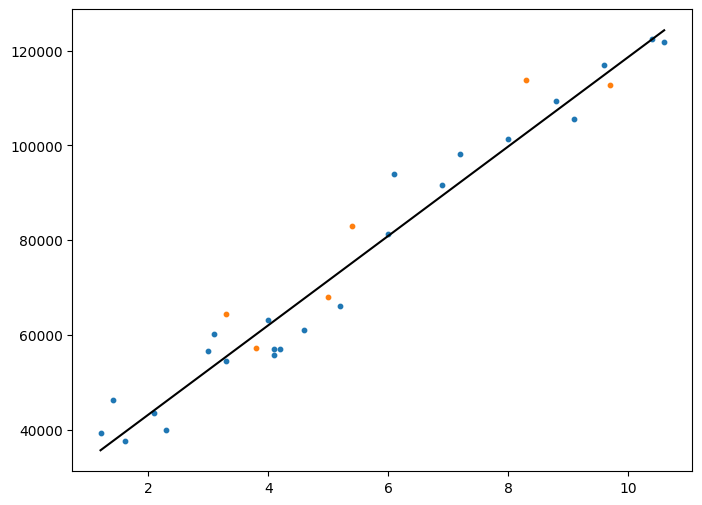

In [27]:
y_pred_line = regressor.predict(X)
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, s=10)
m2 = plt.scatter(X_test, y_test, s=10)
plt.plot(X, y_pred_line, color='black')
plt.show()